# Explore here

In [2]:
# Your code here
# comienzo con la importacion de los requirimientos y la creacion de DF:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load
from pickle import dump as pickle_dump, load as pickle_load

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.to_csv('../data/raw/raw.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:

# Preprocesamiento
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [5]:

# Escalado
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

# Modelo Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)
print("Precisión Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print("Reporte de Clasificación Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))


Precisión Árbol de Decisión: 0.7467532467532467
Reporte de Clasificación Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [7]:

# Modelo Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print("Mejores hiperparámetros Random Forest:", best_params_rf)

best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_rf_class = (y_pred_rf > 0.5).astype(int)  # Convertir las predicciones a clases binarias
print("Precisión Random Forest con mejores hiperparámetros:", accuracy_score(y_test, y_pred_rf_class))
print("Reporte de Clasificación Random Forest:")
print(classification_report(y_test, y_pred_rf_class))


Mejores hiperparámetros Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Precisión Random Forest con mejores hiperparámetros: 0.7597402597402597
Reporte de Clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [10]:

# Modelo Gradient Boosting
boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
print("datos de Precisión del Gradient Boosting:", accuracy_score(y_test, y_pred_boosting))
print("Datos de Clasificación del Gradient Boosting:")
print(classification_report(y_test, y_pred_boosting))

param_grid_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10]
}
grid_boosting = GridSearchCV(boosting_model, param_grid_boosting, scoring='accuracy', cv=5)
grid_boosting.fit(X_train, y_train)
best_params_boosting = grid_boosting.best_params_
print("Mejores hiperparámetros del Gradient Boosting:", best_params_boosting)

best_boosting_model = GradientBoostingClassifier(**best_params_boosting, random_state=42)
best_boosting_model.fit(X_train, y_train)
y_pred_best_boosting = best_boosting_model.predict(X_test)
print("Datos de Precisión del Gradient Boosting con mejores hiperparámetros:", accuracy_score(y_test, y_pred_best_boosting))
print("Datos de Clasificación del Gradient Boosting con los mejores hiperparámetros:")
print(classification_report(y_test, y_pred_best_boosting))


datos de Precisión del Gradient Boosting: 0.7467532467532467
Datos de Clasificación del Gradient Boosting:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Mejores hiperparámetros del Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Datos de Precisión del Gradient Boosting con mejores hiperparámetros: 0.7662337662337663
Datos de Clasificación del Gradient Boosting con los mejores hiperparámetros:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.

In [ ]:

# Guardo los modelos mejorados
dump(best_rf_model, '../models/random_forest_model.joblib')
pickle_dump(best_boosting_model, open("../models/boosting_model.sav", "wb"))


In [12]:

# Analizar la precisión por clase
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    


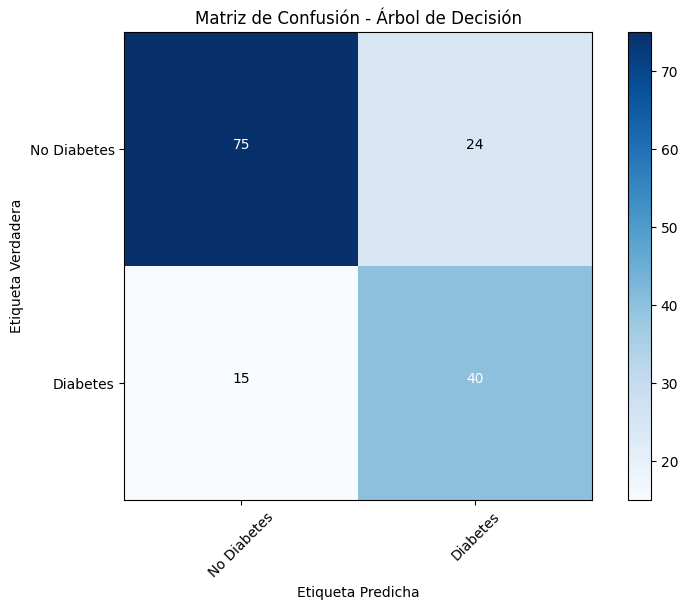

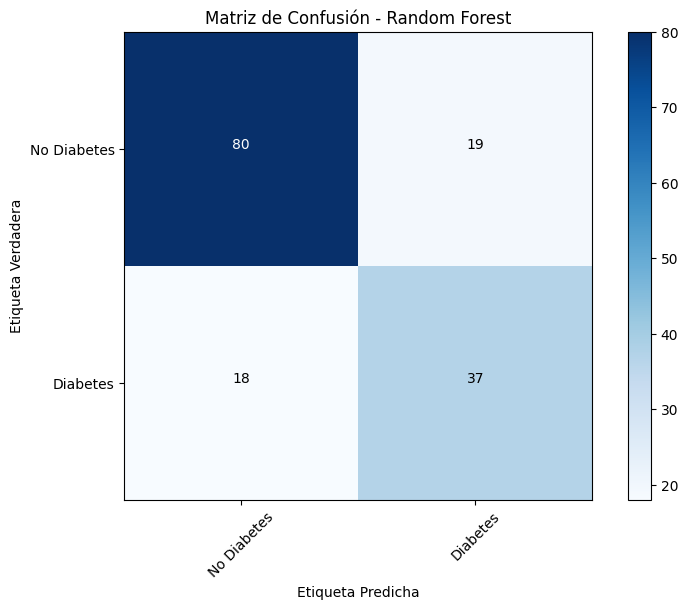

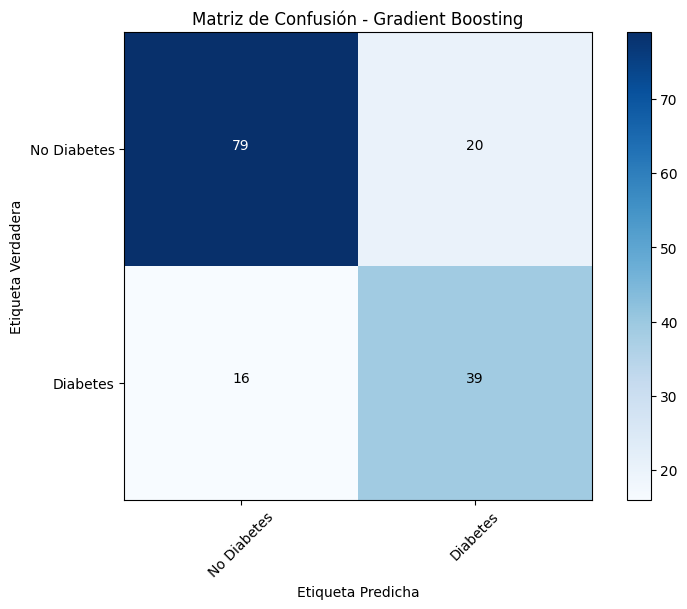

In [13]:

import itertools

# Matriz de confusión y reporte para el Árbol de Decisión
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_tree, classes=['No Diabetes', 'Diabetes'], title='Matriz de Confusión - Árbol de Decisión')

# Matriz de confusión y reporte para el Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_class)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_rf, classes=['No Diabetes', 'Diabetes'], title='Matriz de Confusión - Random Forest')

# Matriz de confusión y reporte para el Gradient Boosting
cm_boosting = confusion_matrix(y_test, y_pred_best_boosting)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_boosting, classes=['No Diabetes', 'Diabetes'], title='Matriz de Confusión - Gradient Boosting')

plt.show()